# Initializing PRAW and Retrieving Reddit Data

In [4]:
# Install PRAW package for accessing Reddit API
!pip install praw 

  Obtaining dependency information for praw from https://files.pythonhosted.org/packages/81/6a/21bc058bcccbe03f6a0895bf1bd60c805f0c526aa4e9bfaac775ed0b299c/praw-7.7.1-py3-none-any.whl.metadata
  Using cached praw-7.7.1-py3-none-any.whl.metadata (9.8 kB)
  Obtaining dependency information for prawcore<3,>=2.1 from https://files.pythonhosted.org/packages/96/5c/8af904314e42d5401afcfaff69940dc448e974f80f7aa39b241a4fbf0cf1/prawcore-2.4.0-py3-none-any.whl.metadata
  Using cached prawcore-2.4.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached update_checker-0.18.0-py3-none-any.whl (7.0 kB)
Using cached praw-7.7.1-py3-none-any.whl (191 kB)
Using cached prawcore-2.4.0-py3-none-any.whl (17 kB)


# Reddit API Wrapper Configuration

In [5]:
# Reddit API wrapper
import praw
# Set up Reddit API credentials
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="GHhEckF8DOx55ewNr89-1A",
    client_secret="7eVs3ZjpkL_gosDaFHgL23fNUAr26w",
    user_agent=user_agent
)

# Libraries for Data Manipulation and Numerical Computing

In [6]:
# Data manipulation library
import pandas as pd
# Numerical computing library
import numpy as np
# Regular expression library for text cleaning
import re 

# Reddit Submission Data Collection and Analysis

In [7]:
# Initialize an empty set to store unique submission titles
headlines = set()
# Loop through submissions in the "bitcoin" subreddit, fetching various attributes of each submission
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)# Print the title of the submission
    print(submission.id) # Print the ID of the submission
    print(submission.author) # Print the author of the submission
    print(submission.created_utc) # Print the timestamp of when the submission was created (in UTC)
    print(submission.score) # Print the score (upvotes - downvotes) of the submission
    print(submission.upvote_ratio) # Print the upvote ratio of the submission
    print(submission.url) # Print the URL of the submission
    break  # Break the loop after processing the first submission
    headlines.add(submission.title) # Add the title of the submission to the set of headlines
print(len(headlines)) # Print the number of unique headlines collected

Bitcoin Newcomers FAQ - Please read!
16bm9de
BitcoinFan7
1694011779.0
196
0.94
https://www.reddit.com/r/Bitcoin/comments/16bm9de/bitcoin_newcomers_faq_please_read/
0


In [8]:
# Fetching data from the 'bitcoin' subreddit
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

786


# Data Cleaning and Preparation

In [9]:
# Create a DataFrame from the set of headlines
bitcoin_df = pd.DataFrame(headlines)
# Display the first few rows of the DataFrame
bitcoin_df.head()

,0
0,What's the best video to orange pill someone?
1,How bitcoin enforces its fixed supply - a pres...
2,How to access this bitcoin
3,BTC reached 5% of portfolio
4,Btc adresses


In [14]:
# Display the column names of the DataFrame
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [15]:
 # Rename the column to 'Titles'
bitcoin_df.columns = ['Titles']

In [16]:
# Display the first few rows of the DataFrame with the updated column name
bitcoin_df.head()

,Titles
0,What's the best video to orange pill someone?
1,How bitcoin enforces its fixed supply - a pres...
2,How to access this bitcoin
3,BTC reached 5% of portfolio
4,Btc adresses


In [17]:
# Count the number of duplicated titles in the 'Titles' column
bitcoin_df.Titles.duplicated().sum() 

0

# Text Cleaning Function 

In [18]:
# Clean the text

# Define a function to clean the titles
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions, replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

# Apply the cleaning function to the 'Titles' column
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,What's the best video to orange pill someone?
1,How bitcoin enforces its fixed supply - a pres...
2,How to access this bitcoin
3,BTC reached 5% of portfolio
4,Btc adresses


# Function to Remove Emojis and Unicode Characters

In [19]:
# Define a function to remove emojis and Unicode characters from the text
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Apply the function to remove emojis and Unicode characters from the 'Titles' column
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,What's the best video to orange pill someone?
1,How bitcoin enforces its fixed supply - a pres...
2,How to access this bitcoin
3,BTC reached 5% of portfolio
4,Btc adresses


In [20]:
# Install TextBlob package for sentiment analysis
!pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 262.6 kB/s eta 0:00:03
     -------- --------------------------- 153.6/636.8 kB 913.1 kB/s eta 0:00:01
     ------------------------------- ------ 532.5/636.8 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 2.7 MB/s eta 0:00:00


# Sentiment Analysis

In [21]:
# Import necessary libraries
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Functions for Subjectivity and Polarity Analysis

In [22]:
# Create a function to get the subjectivity of the text
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity of the text
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Add new columns for subjectivity and polarity to the dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

# Display the updated dataframe
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,What's the best video to orange pill someone?,0.3,1.00
1,How bitcoin enforces its fixed supply - a pres...,0.1,0.05
2,How to access this bitcoin,0.0,0.00
3,BTC reached 5% of portfolio,0.0,0.00
4,Btc adresses,0.0,0.00


# Categorizing Sentiment

In [24]:
# Import the seaborn library for statistical data visualization
import seaborn as sns
# Import the warnings module to handle warning messages
import warnings
# Import WordCloud and STOPWORDS classes for creating word clouds
from wordcloud import WordCloud, STOPWORDS
# Import the matplotlib library for creating plots
import matplotlib.pyplot as plt
# Set the plot style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Function to Categorize Polarity Scores

In [23]:
# Define a function to categorize polarity scores into different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
# Apply the getInsight function to the 'Polarity' column and store the results in a new column 'Insight'    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)
# Display the first 50 rows of the dataframe with the new 'Insight' column
bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,What's the best video to orange pill someone?,0.300000,1.000000,Positive
1,How bitcoin enforces its fixed supply - a pres...,0.100000,0.050000,Positive
2,How to access this bitcoin,0.000000,0.000000,Neutral
3,BTC reached 5% of portfolio,0.000000,0.000000,Neutral
4,Btc adresses,0.000000,0.000000,Neutral
5,Ledger or Trezor,0.000000,0.000000,Neutral
6,God candle,0.000000,0.000000,Neutral
7,Bitcoin vs Riksbanken (Oldest Central Bank),0.250000,0.000000,Neutral
8,24 recovery phrase out of order,0.000000,0.000000,Neutral
9,All we care about is the price of BTC in fiat,0.000000,0.000000,Neutral


# Visualizing the Data

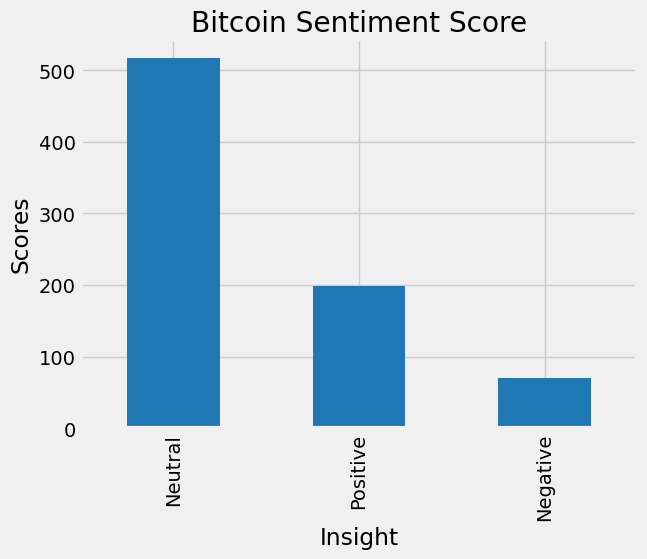

In [25]:
# Plot the sentiment score counts for Bitcoin headlines
plt.title("Bitcoin Sentiment Score")# Set the title of the plot
plt.xlabel("Sentiment") # Set the label for the x-axis
plt.ylabel("Scores") # Set the label for the y-axis
plt.rcParams["figure.figsize"] = (10,8) # Set the size of the plot
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")# Plot the sentiment score counts as a bar plot
plt.show()# Display the plot

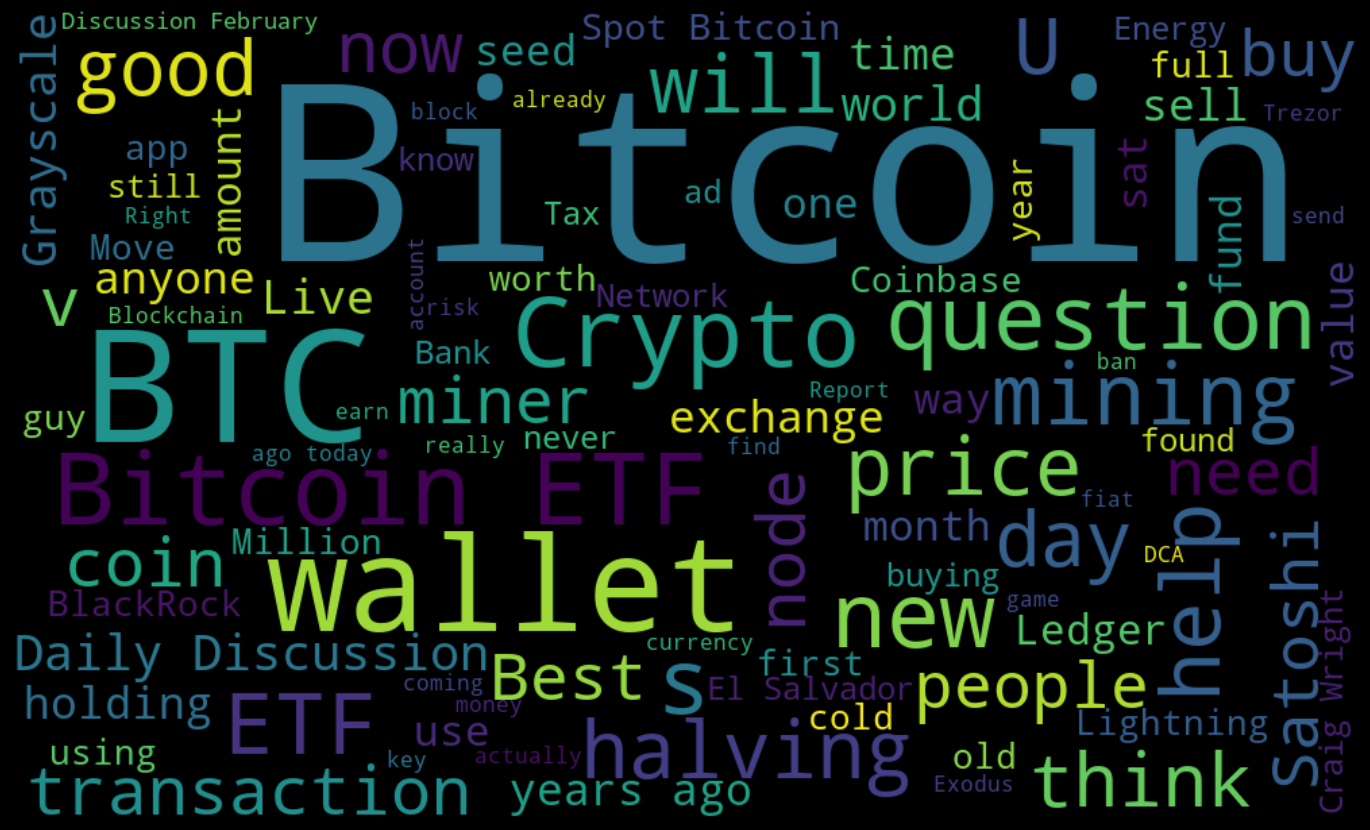

In [26]:
# Concatenate all titles into a single string
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) 
# Generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

# Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");# Hide axis